In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import joblib
from sklearn.model_selection import KFold

In [3]:
def plot_learning_curve(estimator, title, X, y, cv=3, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object
        An object of that type which is cloned for each validation.
        This object is assumed to implement the scikit-learn estimator interface.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features)
        Target relative to X for classification or regression;
        None for unsupervised learning.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Default is 5-fold cross-validation.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        None means 1 unless in a joblib.parallel_backend context.
        -1 means using all processors.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.

    scoring : string, callable or None, optional, default: None
        A string (see model evaluation documentation) or a scorer callable object / function with
        signature scorer(estimator, X, y).
    """
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="red")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="blue")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="red", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="blue", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

In [4]:
df = pd.read_csv(r"/kaggle/input/feature-common-language/audio_features_partial.csv")
df.head()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,mfcc_1,mfcc_2,mfcc_3,mfcc_4,...,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,label,file_path
0,0.712224,0.055740,2989.050985,2193.800068,5666.294643,0.275144,-202.32579,27.614292,4.094784,5.301181,...,4.752774,-0.985637,-6.752584,-4.679379,-5.478848,-0.866508,-1.919669,-0.634521,Arabic,/kaggle/input/preprocess-common-language/proce...
1,0.598403,0.074004,2372.315827,2065.561020,4795.649510,0.178041,-137.41476,59.931843,5.077963,-5.712012,...,-12.469353,-2.134825,-10.989368,-1.460541,-4.485021,-0.408789,-8.211143,-5.170048,Arabic,/kaggle/input/preprocess-common-language/proce...
2,0.756316,0.046051,3274.178654,2196.474265,5870.572917,0.353054,-233.02031,22.691550,10.057923,3.829097,...,-1.657243,-5.409642,-4.017134,-6.744406,-1.697630,-0.387302,0.829549,1.292110,Arabic,/kaggle/input/preprocess-common-language/proce...
3,0.588983,0.061376,1948.418292,2049.242741,4186.921296,0.137682,-199.04490,80.806870,31.451380,-1.297673,...,-4.202263,0.065943,-9.312079,-7.164060,-3.082040,-8.046175,-3.083879,-2.018449,Arabic,/kaggle/input/preprocess-common-language/proce...
4,0.647222,0.069638,1705.618989,1824.714129,3730.709877,0.095540,-325.47556,92.373820,17.725632,31.867613,...,3.169903,4.538502,-1.073114,-1.204524,-0.108214,-4.803460,-2.882802,-1.455632,Arabic,/kaggle/input/preprocess-common-language/proce...


In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder with your actual labels
label_encoder.fit(df['label'])

# Transform actual labels to numeric labels
df['numeric_labels'] = label_encoder.transform(df['label'])

In [6]:
X = df.drop(columns=['label','numeric_labels','file_path'])
y = df['numeric_labels']

In [7]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [8]:
from collections import Counter

# Jumlah kelas sebelum SMOTE
print("Jumlah kelas sebelum SMOTE:")
print(Counter(y))

# Jumlah kelas setelah SMOTE
print("\nJumlah kelas setelah SMOTE:")
print(Counter(y_resampled))

Jumlah kelas sebelum SMOTE:
Counter({2: 3570, 39: 3177, 19: 3012, 6: 3003, 27: 2955, 41: 2784, 24: 2766, 0: 2751, 20: 2733, 37: 2691, 10: 2550, 33: 2547, 18: 2520, 21: 2484, 42: 2472, 8: 2442, 40: 2367, 26: 2331, 30: 2283, 28: 2277, 23: 2268, 32: 2238, 7: 2202, 31: 2196, 43: 2181, 15: 2073, 44: 2073, 5: 2016, 34: 1977, 9: 1962, 25: 1947, 12: 1932, 1: 1914, 16: 1890, 29: 1884, 14: 1863, 3: 1830, 17: 1830, 4: 1797, 11: 1773, 35: 1758, 36: 1752, 38: 1737, 22: 1695, 13: 1623})

Jumlah kelas setelah SMOTE:
Counter({0: 3570, 4: 3570, 9: 3570, 27: 3570, 18: 3570, 24: 3570, 23: 3570, 13: 3570, 20: 3570, 11: 3570, 16: 3570, 40: 3570, 28: 3570, 15: 3570, 21: 3570, 8: 3570, 31: 3570, 29: 3570, 5: 3570, 7: 3570, 41: 3570, 44: 3570, 3: 3570, 2: 3570, 14: 3570, 43: 3570, 36: 3570, 26: 3570, 34: 3570, 12: 3570, 37: 3570, 35: 3570, 42: 3570, 33: 3570, 17: 3570, 25: 3570, 6: 3570, 30: 3570, 39: 3570, 22: 3570, 10: 3570, 1: 3570, 19: 3570, 32: 3570, 38: 3570})


In [9]:
### split data 80% 20%

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.2, random_state=42,
                                                    stratify=y_resampled)

In [10]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fit scaler pada data training dan transform kedua set data
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [11]:
pd.DataFrame(X_train_normalized)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.125270,-0.462618,-0.063722,0.962710,0.546778,-0.530245,-0.215304,-0.176643,1.412404,0.383635,...,0.193716,0.060471,0.656303,-0.022266,0.317852,-0.352507,-1.010202,-1.367641,-1.260068,-1.444051
1,-0.447086,-0.164635,-0.081286,0.298297,0.031393,-0.255482,0.851859,-0.201491,-0.137365,0.157049,...,-1.101902,-1.626334,0.223691,0.817619,-1.296437,-0.614610,-0.134165,-3.339167,-0.671473,0.503199
2,-0.136721,0.693945,-0.652197,0.593003,-0.029296,-1.373536,0.804041,0.107182,0.606830,0.598271,...,-0.054259,-1.238785,-1.046840,-2.431179,-2.554992,-2.492506,-0.366025,-0.626432,0.076768,0.491064
3,-1.041236,1.421366,-0.560796,0.131813,-0.337850,-0.264703,0.680879,-0.053193,0.069079,0.717965,...,-1.921328,0.441973,0.176668,-2.161943,0.177355,0.315965,-1.888467,0.640302,0.116856,-1.150069
4,-0.923043,-0.815273,0.428687,0.336918,0.459523,0.063171,0.295056,-0.775594,-1.244932,-2.012682,...,0.224048,0.497766,0.512246,-0.309098,-0.438342,0.097450,0.281906,0.694139,0.955619,-1.263811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128515,-1.069659,0.820296,-1.411504,-1.652472,-1.413538,-0.950462,-2.531171,1.026397,-0.282676,2.174811,...,-1.828143,0.285871,0.049287,0.720958,0.020781,-1.278091,-0.628007,0.212564,-1.642634,-2.222433
128516,0.000360,-0.463296,-0.023205,0.176157,-0.034989,-0.226584,0.809894,-0.064593,-0.741426,-1.760898,...,0.442690,0.649209,-0.596835,-1.256466,-0.773914,-1.425531,-1.128419,-0.704997,-0.171163,0.474619
128517,-2.370420,1.866536,-1.352947,-1.059491,-1.572022,-0.799900,-0.373726,1.257349,0.578946,0.872449,...,0.865331,-0.488842,0.075970,0.050136,-1.373727,0.271099,-0.194054,-0.750243,-1.434839,0.372517
128518,0.146890,-0.653630,0.677426,0.721152,0.754992,0.370645,0.048390,-0.953738,0.222994,0.610338,...,-0.512452,-1.230825,0.102356,0.297172,-0.461706,-1.169560,-0.183656,0.060295,0.011697,0.617881


In [12]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [28]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.models import Model, load_model
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import *
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

class NeuralNetworkClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.model = None
        self.history = None
    
    def fit(self, X, y):
        # Reshape input untuk LSTM
        X_reshaped = X.reshape(X.shape[0], X.shape[1], 1)
        
        # Buat dan compile model
        inputs = Input(shape=(X.shape[1], 1))
        x = Bidirectional(LSTM(256, return_sequences=True, kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))(inputs)
        x = BatchNormalization()(x)
        x = Dropout(0.3)(x)
        x = Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))(x)
        x = BatchNormalization()(x)
        x = Dropout(0.3)(x)
        x = Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))(x)
        x = BatchNormalization()(x)
        x = Dropout(0.3)(x)
        attention = Attention()([x, x])
        x = Flatten()(attention)
        x = Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(x)
        x = BatchNormalization()(x)
        x = Dropout(0.3)(x)
        outputs = Dense(len(np.unique(y)), activation='softmax')(x)
        self.model = Model(inputs=inputs, outputs=outputs)
        
        self.model.compile(optimizer=Adam(learning_rate=0.001),
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])
        
        # Callbacks
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
        reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5, min_lr=0.000001, verbose=1)
        model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
        
        # Fit the model
        self.history = self.model.fit(
            X_reshaped, y,
            validation_split=0.2,
            epochs=200,
            batch_size=64,
            callbacks=[early_stopping, reduce_lr, model_checkpoint],
            verbose=1
        )
        
        # Load the best model
        self.model = load_model('best_model.keras')
        return self
    
    def predict(self, X):
        X_reshaped = X.reshape(X.shape[0], X.shape[1], 1)
        return np.argmax(self.model.predict(X_reshaped), axis=1)
    
    def predict_proba(self, X):
        X_reshaped = X.reshape(X.shape[0], X.shape[1], 1)
        return self.model.predict(X_reshaped)

# Inisialisasi model
nn_model = NeuralNetworkClassifier()

# Fit model dengan data training yang sudah dinormalisasi
nn_model.fit(X_train_normalized, y_train)

# Prediksi probabilitas untuk data training dan testing yang sudah dinormalisasi
train_proba = nn_model.predict_proba(X_train_normalized)
test_proba = nn_model.predict_proba(X_test_normalized)

# Inisialisasi dan fit Random Forest sebagai final estimator
rf_final = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=None,
    bootstrap=False,
    random_state=42
)

rf_final.fit(train_proba, y_train)

# Prediksi menggunakan model stacking
stacking_pred = rf_final.predict(test_proba)

# Hitung akurasi
accuracy = accuracy_score(y_test, stacking_pred)
print(f"Akurasi model stacking: {accuracy:.5f}")

Epoch 1/200
1606/1607 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0835 - loss: 4.2927
Epoch 1: val_accuracy improved from -inf to 0.23257, saving model to best_model.keras
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.0836 - loss: 4.2923 - val_accuracy: 0.2326 - val_loss: 3.4108 - learning_rate: 0.0010
Epoch 2/200
1606/1607 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2284 - loss: 3.4381
Epoch 2: val_accuracy improved from 0.23257 to 0.28968, saving model to best_model.keras
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.2285 - loss: 3.4380 - val_accuracy: 0.2897 - val_loss: 3.1678 - learning_rate: 0.0010
Epoch 3/200
1605/1607 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2723 - loss: 3.2529
Epoch 3: val_accuracy improved from 0.28968 to 0.31388, saving model to best_model.keras
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.2724 - loss: 3.2529 - val_accuracy: 0.3139 - val_loss: 3.0688 - learning_rate: 0.0010
Epoch 4/200
1607/1607 ━━━━━━━━━

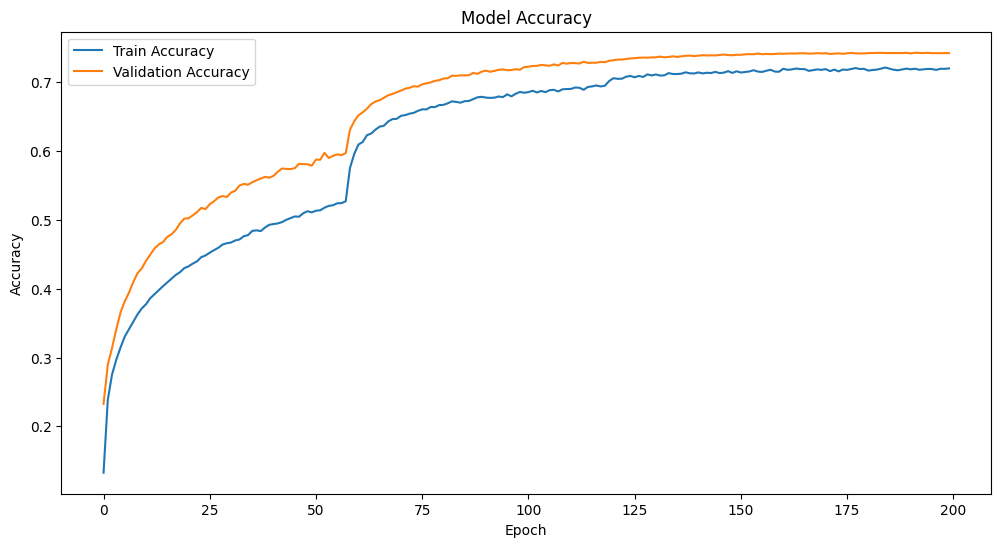

In [29]:
# Plot learning curve
plt.figure(figsize=(12, 6))
plt.plot(nn_model.history.history['accuracy'], label='Train Accuracy')
plt.plot(nn_model.history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

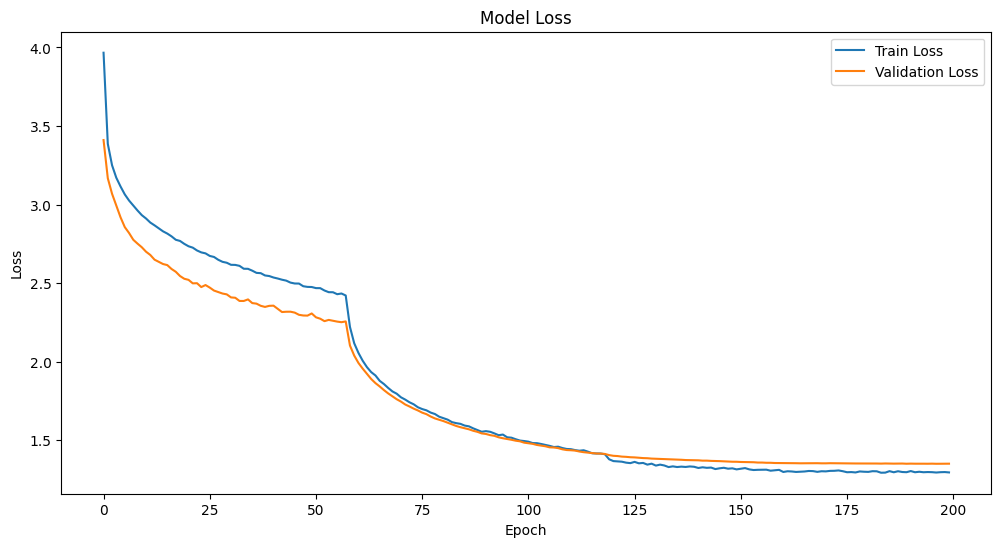

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(nn_model.history.history['loss'], label='Train Loss')
plt.plot(nn_model.history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
best_rf = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=None,
    bootstrap=False,
    random_state=42
)

# Fit model
best_rf.fit(X_train_normalized, y_train)

# Hitung akurasi menggunakan .score()
train_accuracy = best_rf.score(X_train_normalized, y_train)
test_accuracy = best_rf.score(X_test_normalized, y_test)

print(f"Akurasi pada data training: {train_accuracy:.5f}")
print(f"Akurasi pada data testing: {test_accuracy:.5f}")

Akurasi pada data training: 1.00000
Akurasi pada data testing: 0.84059


In [36]:
from tensorflow.keras.models import load_model

# Memuat model
loaded_model = load_model('/kaggle/input/nn_model_slid/keras/best_model1/1/best_model.keras')

In [42]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Input, LSTM, Bidirectional, BatchNormalization, Dropout, Attention, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1_l2

class NeuralNetworkClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model_path='/kaggle/input/nn_model_slid/keras/best_model1/1/best_model.keras'):
        self.base_model = load_model(model_path, custom_objects={'Attention': Attention})
        
        # Create a wrapper model
        inputs = Input(shape=(45,))
        x = Dense(26, activation='relu')(inputs)
        x = Reshape((26, 1))(x)
        outputs = self.base_model(x)
        self.model = Model(inputs=inputs, outputs=outputs)
    
    def fit(self, X, y):
        return self
    
    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=1)
    
    def predict_proba(self, X):
        return self.model.predict(X)

# Inisialisasi Random Forest sebagai base model
rf_base = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=None,
    bootstrap=True,
    random_state=42
)

# Fit Random Forest dengan data training yang sudah dinormalisasi
rf_base.fit(X_train_normalized, y_train)

# Inisialisasi Neural Network Classifier dengan model yang telah disimpan
nn_final = NeuralNetworkClassifier('/kaggle/input/nn_model_slid/keras/best_model1/1/best_model.keras')

# Prediksi probabilitas menggunakan Random Forest
rf_train_proba = rf_base.predict_proba(X_train_normalized)
rf_test_proba = rf_base.predict_proba(X_test_normalized)

# Prediksi menggunakan model stacking
stacking_pred = nn_final.predict(rf_test_proba)

# Hitung akurasi
accuracy = accuracy_score(y_test, stacking_pred)
print(f"Akurasi model stacking: {accuracy:.5f}")

1005/1005 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step
Akurasi model stacking: 0.03178


In [43]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize and fit the Random Forest model (base model)
rf_base = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=None,
    bootstrap=False,
    random_state=42
)
rf_base.fit(X_train_normalized, y_train)

# Get probabilities for training and testing data
train_proba = rf_base.predict_proba(X_train_normalized)
test_proba = rf_base.predict_proba(X_test_normalized)

# Initialize and fit KNN as the final estimator
knn_final = KNeighborsClassifier(n_neighbors=1)
knn_final.fit(train_proba, y_train)

# Predict using the stacking model
stacking_pred = knn_final.predict(test_proba)

# Calculate accuracy
accuracy = accuracy_score(y_test, stacking_pred)
print(f"Accuracy of the stacking model: {accuracy:.5f}")

Accuracy of the stacking model: 0.84065


In [13]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
import numpy as np

np.random.seed(42)

# Base models
rf = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=None,
    bootstrap=False,
    random_state=42
)
knn = KNeighborsClassifier(n_neighbors=1)
dt = DecisionTreeClassifier(random_state=42)

# Final estimator
final_estimator = LogisticRegression(multi_class='multinomial', max_iter=2000)

# Function to get out-of-fold predictions
def get_oof_pred(model, X, y, cv=3):
    oof_pred = cross_val_predict(model, X, y, cv=cv, method='predict_proba')
    return oof_pred

# Get out-of-fold predictions for base models
rf_oof = get_oof_pred(rf, X_train_normalized, y_train)
knn_oof = get_oof_pred(knn, X_train_normalized, y_train)
dt_oof = get_oof_pred(dt, X_train_normalized, y_train)

# Combine out-of-fold predictions
X_train_meta = np.hstack([rf_oof, knn_oof, dt_oof])

# Fit final estimator
final_estimator.fit(X_train_meta, y_train)

# Fit base models on entire training data
rf.fit(X_train_normalized, y_train)
knn.fit(X_train_normalized, y_train)
dt.fit(X_train_normalized, y_train)

# Get predictions for test data
rf_test = rf.predict_proba(X_test_normalized)
knn_test = knn.predict_proba(X_test_normalized)
dt_test = dt.predict_proba(X_test_normalized)

# Combine test predictions
X_test_meta = np.hstack([rf_test, knn_test, dt_test])

# Final prediction
final_pred = final_estimator.predict(X_test_meta)

# Calculate accuracy
accuracy = accuracy_score(y_test, final_pred)
print(f"Accuracy of the stacking model: {accuracy:.5f}")

Accuracy of the stacking model: 0.87442
